In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**THIS IS THE PART ON REDUCING THE DATA FOR THE ABSOLUTE VALUE OF SCHEIDUNGEN**

In [144]:
#Read the data into the object "Scheidungen"
Scheidungen = pd.read_csv("data/Raw/KANTON_ZUERICH_447.csv", sep=";")

#Keep only four rows and locate only the rows with towns, villages, etc. and then show
Scheidungen = Scheidungen[["GEBIET_NAME", "INDIKATOR_NAME", "INDIKATOR_JAHR", "INDIKATOR_VALUE"]].iloc[:5477]
Scheidungen

,GEBIET_NAME,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE
0,Aeugst a.A.,Scheidungen [Anz.],1990,4.0
1,Aeugst a.A.,Scheidungen [Anz.],1991,3.0
2,Aeugst a.A.,Scheidungen [Anz.],1992,2.0
3,Aeugst a.A.,Scheidungen [Anz.],1993,3.0
4,Aeugst a.A.,Scheidungen [Anz.],1994,3.0
...,...,...,...,...
5472,Wiesendangen,Scheidungen [Anz.],2017,10.0
5473,Wiesendangen,Scheidungen [Anz.],2018,7.0
5474,Wiesendangen,Scheidungen [Anz.],2019,12.0
5475,Wiesendangen,Scheidungen [Anz.],2020,16.0


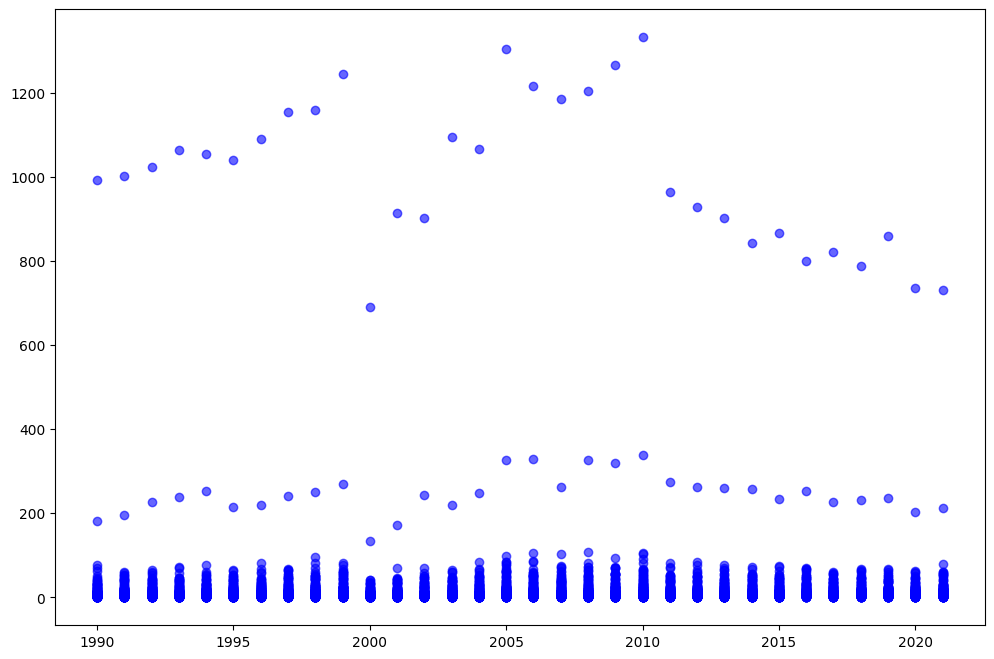

In [145]:
#Create a figure and axis, specify the figure size
fig, ax = plt.subplots(1, figsize=(12, 8))

#Add the scatter plot
ax.scatter(Scheidungen["INDIKATOR_JAHR"], Scheidungen["INDIKATOR_VALUE"],
          color="blue", label="SCHEIDUNGEN", alpha=0.6)

In [146]:
#Save the reduced data as "Scheidungen_Reduced" into processed data
Scheidungen.to_csv("data/Processed/Scheidungen_Reduced.csv", index=False)

**THIS IS THE PART ON REDUCING THE DATA FOR THE POPULATION**

In [156]:
#Read the data into the object "Bevoelkerung"
Bevoelkerung = pd.read_csv("data/Raw/KANTON_ZUERICH_133.csv", sep=";")

#Keep only four rows and locate only the rows with towns, villages, etc. and then show
Bevoelkerung = Bevoelkerung[["GEBIET_NAME", "INDIKATOR_NAME", "INDIKATOR_JAHR", "INDIKATOR_VALUE"]].iloc[:10500]
Bevoelkerung

,GEBIET_NAME,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE
0,Aeugst a.A.,Bevölkerung [Pers.],1962,710
1,Aeugst a.A.,Bevölkerung [Pers.],1963,720
2,Aeugst a.A.,Bevölkerung [Pers.],1964,705
3,Aeugst a.A.,Bevölkerung [Pers.],1965,695
4,Aeugst a.A.,Bevölkerung [Pers.],1966,745
...,...,...,...,...
10495,Wiesendangen,Bevölkerung [Pers.],2017,6355
10496,Wiesendangen,Bevölkerung [Pers.],2018,6512
10497,Wiesendangen,Bevölkerung [Pers.],2019,6601
10498,Wiesendangen,Bevölkerung [Pers.],2020,6636


**THIS IS THE PART ON REDUCING THE DATA FOR THE POPULATION**

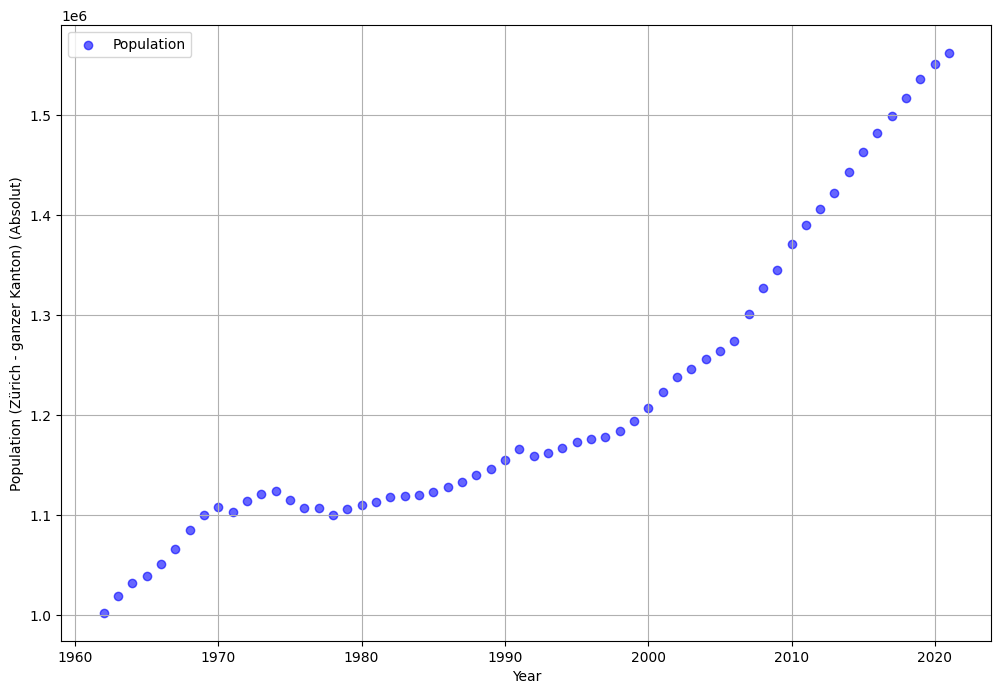

In [161]:
Bevoelkerung = pd.read_csv("data/Raw/KANTON_ZUERICH_133.csv", sep=";")
Bevoelkerung = Bevoelkerung.loc[Bevoelkerung["GEBIET_NAME"]=="Zürich - ganzer Kanton"]
#Create a figure and axis, specify the figure size
fig, ax = plt.subplots(1, figsize=(12, 8))

# Add the scatter plot
ax.scatter(Bevoelkerung["INDIKATOR_JAHR"], Bevoelkerung["INDIKATOR_VALUE"],
          color="blue", label="SCHEIDUNGEN", alpha=0.6)
ax.set_xlabel("Year")
ax.set_ylabel("Population (Zürich - ganzer Kanton) (Absolut)")
ax.legend(loc="upper left")
ax.grid()

In [135]:
#Save the reduced data as "Scheidungen_Reduced" into processed data
Bevoelkerung.to_csv("data/Processed/Bevoelkerung_Reduced.csv", index=False)

**THIS IS THE PART ON MERGING THE POPULATION AND THE SCHEIDUNGEN**

In [136]:
#Merge the objects Bevoelkerung und Scheidugnen via left, then rename columns and show only four columns needed. Then drop NaN values
ICH_CHECKE_ES_NICHT = pd.merge(Bevoelkerung, Scheidungen, how="left", on=["GEBIET_NAME","INDIKATOR_JAHR"])
ICH_CHECKE_ES_NICHT.rename(columns = {'GEBIET_NAME':'Place', 'INDIKATOR_JAHR':'Year', "INDIKATOR_VALUE_x":"Population", "INDIKATOR_VALUE_y":"Divorces"}, inplace = True)
ICH_CHECKE_ES_NICHT = ICH_CHECKE_ES_NICHT[["Place", "Year", "Population", "Divorces"]]
ICH_CHECKE_ES_NICHT = ICH_CHECKE_ES_NICHT.dropna()

In [137]:
#Add a new column called Divorces 1pk to show the divorces per 1000 persons
ICH_CHECKE_ES_NICHT["Divorces p1k"] = ICH_CHECKE_ES_NICHT["Divorces"]/ICH_CHECKE_ES_NICHT["Population"]*1000
ICH_CHECKE_ES_NICHT

,Place,Year,Population,Divorces,Divorces p1k
28,Aeugst a.A.,1990,1200,4.0,3.333333
29,Aeugst a.A.,1991,1237,3.0,2.425222
30,Aeugst a.A.,1992,1292,2.0,1.547988
31,Aeugst a.A.,1993,1316,3.0,2.279635
32,Aeugst a.A.,1994,1355,3.0,2.214022
...,...,...,...,...,...
10495,Wiesendangen,2017,6355,10.0,1.573564
10496,Wiesendangen,2018,6512,7.0,1.074939
10497,Wiesendangen,2019,6601,12.0,1.817906
10498,Wiesendangen,2020,6636,16.0,2.411091


In [138]:
#Save the merged data as "Scheidungen_1pk" into processed data
ICH_CHECKE_ES_NICHT.to_csv("data/Processed/Scheidungen_1pk.csv", index=False)

(0.0, 10.0)

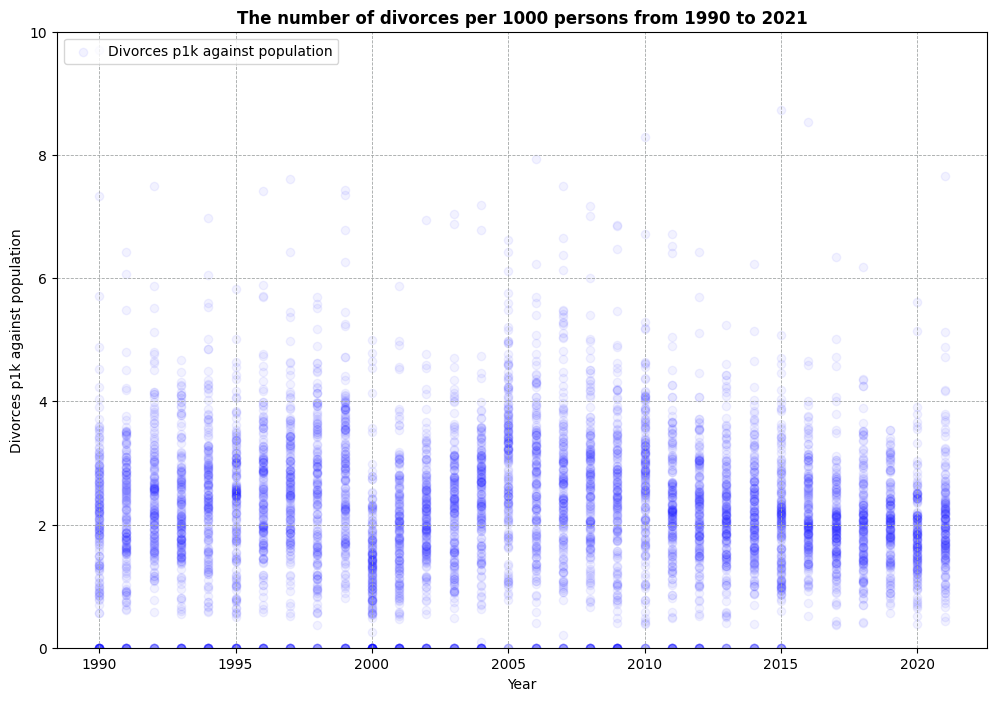

In [166]:
#Create a figure and axis, specify the figure size
fig, ax = plt.subplots(1, figsize=(12, 8))

# Add the scatter plot
ax.scatter(ICH_CHECKE_ES_NICHT["Year"], ICH_CHECKE_ES_NICHT["Divorces p1k"], 
          color="blue", label="Divorces p1k against population", alpha = 0.05)
ax.set_xlabel("Year")
ax.set_ylabel("Divorces p1k against population")
ax.legend(loc="upper left")
ax.grid(color = '#a2a6a6', linestyle = '--', linewidth = 0.6)
ax.set_title("The number of divorces per 1000 persons from 1990 to 2021", fontweight = "bold")
plt.ylim((0,10))
#plt.xlim((0,20000))